<h1 align="center">IBM Data Science Professional Certificate</h1>

<h2 align="center">Capstone Project</h1>

<h2 align="center">"Predicting the Severity of an Accident in Traffic"</h1>

<h1>Table of content</h1>
    
<ul>
    <li><a href="#introduction">Introduction</a></li>
        <ul>
            <li><a href="#scope">Scope and Background</a></li>
            <li><a href="#objective">The Objective</a></li>
            <li><a href="#stakeholders">Interest and Stakeholders</a></li>
        </ul>
    <li><a href="#data">Data</a></li>
        <ul>
            <li><a href="#source">Data Source</a></li>
            <li><a href="#objective">Data Cleaning</a></li>
        </ul>
    <li><a href="#eda">Exploratory Data Analysis</a></li>         
    <li><a href="#machine_learning">Machine Learning Model Development</a></li>
        <ul>
            <li><a href="#preparation">Preparation</a></li>
            <li><a href="#test_train">Splitting Test and Training Sets</a></li>
            <li><a href="#model">Model Development</a></li>
        </ul>  
    <li><a href="#results">Results</a></li>
        <ul>
            <li><a href="#metrics">Metrics</a></li>
            <li><a href="#roc">ROC Curve</a></li>
        </ul>
</ul>

<hr>

<h1 align="left" id="introduction">Introduction</h1>

This notebook will be mainly used for the capstone project of the ninth and final course of the <strong>IBM Data Science Professional Certificate</strong> on Coursera.

<h3 align="left" id="scope">Scope and Background</h3>

Road accidents are a growing issue worldwide, with millions of deaths and injuries every year all over the world. Road traffic injuries result in <strong>1.35 million deaths on roadways each year globally</strong>. This effects people across all age groups with more than half of the victims being pedestrians, motorcyclists and cyclists. This issue weighs even more heavily within the U.S. where people rely more on their cars, because of the limited public transport options. 

Seattle is the <strong>25th biggest city in the U.S.</strong> and the biggest city in Washington State with almost 3,8 million people living in its metropolitan area. Its inhabitants like to sometimes call it rain city, as the Pacific Northwest is not particularly famous for its fair weather. 

2019 the Seattle Times cite a Texas A&M report saying Seattle ranks <strong>seventh</strong> in the whole United States <strong>in time stuck in traffic</strong>. The report estimates that there were 167,384,000 hours of delay resulting from traffic in 2017. As the saying goes - time is money – meaning these hours also result in a total <strong>annual cost of \\$3.1 billion or \$1,408 for each single commuter</strong>. 

The Washington State Department of Transportation (WSDOT) counted 6,252,554 registered vehicles in Washington State in 2015, with 59.7 billion vehicle miles being travelled within the state. There annual collision report emphasizes the incredible numbers of <strong>a crash every 4.5 minutes as well as a fatal crash every 16 hours</strong>. 

Sadly, these numbers don’t seem to have been decreasing since. 

<h3 align="left" id="objective">The Objective</h3>

Which brings us to our objective: What if we could actively reduce the number of traffic accidents or their severity if we better understand the underlining factors that affect the severity of accidents.

We want to identify <strong>which variables have the biggest impact on the severity of accidents</strong>. Through analysis of the broad range of variables, from road and weather conditions to location data, we can train models to <strong>accurately predict accident severity</strong>.

The insight on which specific conditions can determine the severity can help improve vehicular and road safety, as well as potentially leading to early warning systems for traffic.

These findings gained through the research on Seattle data can then be used to study other cities within the U.S. and worldwide. 

<h3 align="left" id="stakeholders">Interest and Stakeholders</h3>

Learning more about what causes severe crashes should interest everyone, as it leads to making our roads safer. 

Governments could use the findings to improve road safeness by counteracting the conditions affecting the severity of accidents. Installing early warning systems could inform drivers of dangerous conditions via radio, roadside signs or similar, leading to more careful driving. The police, ambulances and hospitals could be on alert near places where specific conditions are met. 

Navigation apps leading through traffic could be enhanced by reacting to the underlying conditions found in our data analysis to avoid traffic and potential accidents. Even car manufactures and insurance companies could benefit by furthering their autonomous driving assistants and tailoring their products to the new information.

<strong>In general, the findings could save lives, time and money and therefore should concern everyone.</strong>

<hr>

<h1 align="left" id="data">Data</h1>

<h3 align="left" id="source">Data Source</h3>

The data we used to study car accident severity in Seattle was provided through the course materials on Coursera  but can also be found on the open data platform of the city of Seattle .

It lists almost 200,000 samples of collisions between 2004 and today. The data comes from traffic records from the Seattle Department of Transportation (SDOT), containing all vehicular accidents between cars, pedestrians, cyclists and so forth. 

It features the <strong>target variable SEVERITYCODE and 37 different attributes</strong> ranging from weather, light and road conditions, to localization data, to if the driver was under the influence, speeding or not paying attention. As our goal is to understand what factors influence the severity of a potential crash, we will reduce the number of features later in this chapter.

The target variable severity can have the value 1 for “property damage only” or 2 for “injury collision”. We must take note of only 58,188 of the 194,673 samples being listed with a severity of 2, leading to the dataset being unbalanced.
<hr>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
# Read the online data set by the URL provided through the course, and assign it to variable "df_data"

data_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df_data = pd.read_csv(data_path)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show the first 10 rows of samples in the dataframe

df_data.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [4]:
# Show the dimensions of the dataframe

df_data.shape

(194673, 38)

In [5]:
# Show the colums included in the dataframe
df_data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
# Show information about the dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [7]:
df_data.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<hr>
<h3 align="left" id="cleaning">Data Cleaning</h3>

We want to eliminate unnecessary information and fill in blanks where data is missing. Only then is the data suited for the machine learning algorithms.

<strong>Firstly we want to remove all unneccessary attributes that aren't useful to analyze the reason for the severity of crashes.</strong>
<hr>

In [8]:
# Creating a new dataframe called "df" to work on with all the attributes we think are useful 
# 'SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR'

df = df_data[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
df.shape

(194673, 13)

<hr>
<strong>The second step is to transform the values of the target variable SEVERITYCODE from values between 1&2 to values between 0&1. The machine learning models can then better use those data points.</strong>
<hr>

In [9]:
# Converting SEVERITYCODE values from 1&2 to 0&1
# We need to import the preprocessing library from sklearn to change the values for the whole target variable
from sklearn import preprocessing

severitycode_values = df['SEVERITYCODE'].values

labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit([1, 2])
severitycode_values = labelEncoder.transform (severitycode_values)

df['SEVERITYCODE'] = severitycode_values
df['SEVERITYCODE'].value_counts()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    136485
1     58188
Name: SEVERITYCODE, dtype: int64

<hr>
<strong>In the third step we want to clean up missing values. First we need to identify missing data before we fill or replace it.</strong>
<hr>

In [11]:
# We want to find which attributes/columns have entries with no values

for column in df.columns.values.tolist():
    print('Entries with missing values in column '+ column +': ')
    print (df[column].isna().sum())
    print("-----------------------------------")
    

Entries with missing values in column SEVERITYCODE: 
0
-----------------------------------
Entries with missing values in column SEVERITYDESC: 
0
-----------------------------------
Entries with missing values in column ADDRTYPE: 
1926
-----------------------------------
Entries with missing values in column INCDATE: 
0
-----------------------------------
Entries with missing values in column INCDTTM: 
0
-----------------------------------
Entries with missing values in column JUNCTIONTYPE: 
6329
-----------------------------------
Entries with missing values in column INATTENTIONIND: 
164868
-----------------------------------
Entries with missing values in column UNDERINFL: 
4884
-----------------------------------
Entries with missing values in column SPEEDING: 
185340
-----------------------------------
Entries with missing values in column WEATHER: 
5081
-----------------------------------
Entries with missing values in column ROADCOND: 
5012
-----------------------------------
En

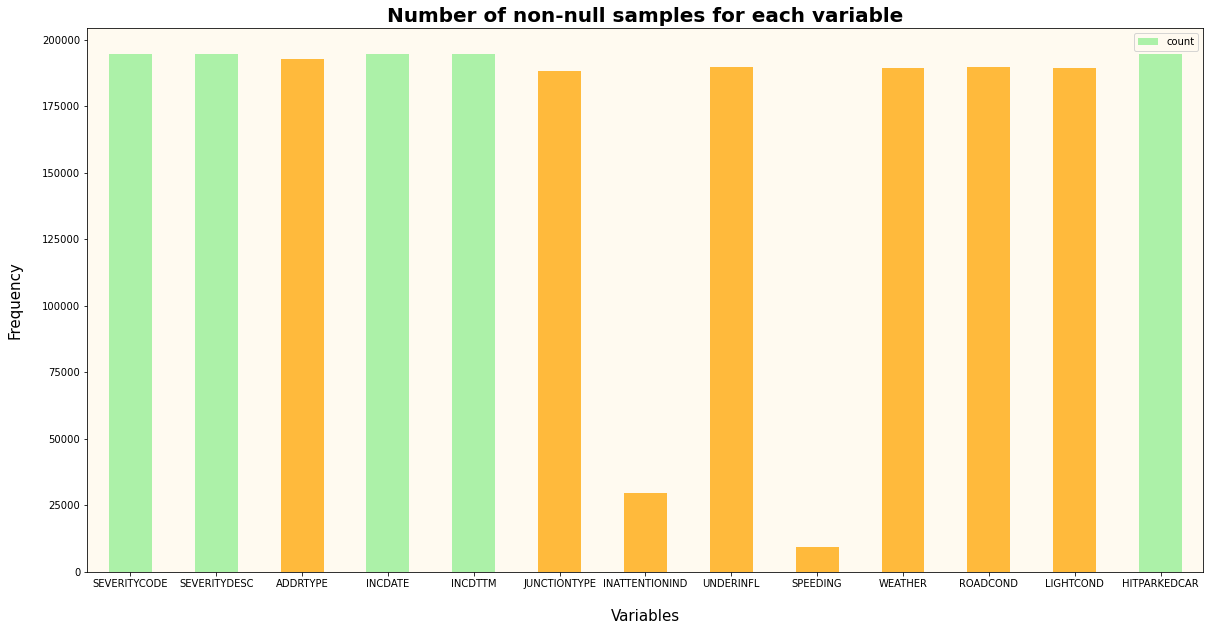

In [12]:
# Relaying the above information as a graph: which colums have entries with empty data
nonnull_descriptive_stats= df.describe(include="all")

nonnull_descriptive_stats_plot=nonnull_descriptive_stats[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]
nonnull_descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
nonnull_descriptive_stats_plot=nonnull_descriptive_stats_plot.transpose()

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.facecolor'] = 'floralwhite'
color_yo=['lightgreen','lightgreen','orange','lightgreen','lightgreen','orange','orange','orange','orange','orange','orange','orange','lightgreen']
nonnull_descriptive_stats_plot.plot(kind='bar',alpha=0.75,color=[color_yo])
plt.title('Number of non-null samples for each variable', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
    
plt.show()

<hr>
<strong>We see that some values are missing and some data needs correcting. We will replace missing values with the value with the highest frequency.</strong>

<strong>1. We will start with the column ADDRTYPE (At what type of location did the accident happen?)</strong>
<hr>

In [13]:
# Show the values for the column ADDRTYPE

print("Number of each kind of value:", '\n', df['ADDRTYPE'].value_counts(), '\n', "Total Number of non-empty entries:", df['ADDRTYPE'].value_counts().sum(), '\n', "Total Number of empty entries:", df['ADDRTYPE'].isna().sum())

Number of each kind of value: 
 Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 
 Total Number of non-empty entries: 192747 
 Total Number of empty entries: 1926


In [14]:
# Replace the empty entries with the most common value using the idxmax() function

df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)

print("Number of each kind of value:", '\n', df['ADDRTYPE'].value_counts(), '\n', "Total Number of non-empty entries:", df['ADDRTYPE'].value_counts().sum(), '\n', "Total Number of empty entries:", df['ADDRTYPE'].isna().sum())

Number of each kind of value: 
 Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<hr>
<strong>2. Column JUNCTIONTYPE (At which type of junction did the accident happen?)</strong>
<hr>

In [15]:
# Show the values for the column JUNCTIONTYPE

print("Number of each kind of value:", '\n', df['JUNCTIONTYPE'].value_counts(), '\n', "Total Number of non-empty entries:", df['JUNCTIONTYPE'].value_counts().sum(), '\n', "Total Number of empty entries:", df['JUNCTIONTYPE'].isna().sum())

Number of each kind of value: 
 Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64 
 Total Number of non-empty entries: 188344 
 Total Number of empty entries: 6329


In [16]:
# Replace the empty entries with the most common value using the idxmax() function
# We will also replace the entries with the value "Unkown" with the most common value
# We will also reduce the number of unique values by combining the two intersection values, the two mid block values, as well as ramp and driveway junction to one value type 

df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)

df["JUNCTIONTYPE"].replace("Mid-Block (but intersection related)", "At_Mid-Block", inplace=True)
df["JUNCTIONTYPE"].replace("Mid-Block (not related to intersection)", "At_Mid-Block", inplace=True)

df["JUNCTIONTYPE"].replace("Ramp Junction", "At_Ramp/Driveway", inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", "At_Ramp/Driveway", inplace=True)

df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", "At_Intersection", inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", "At_Intersection", inplace=True)

print("Number of each kind of value:", '\n', df['JUNCTIONTYPE'].value_counts(), '\n', "Total Number of non-empty entries:", df['JUNCTIONTYPE'].value_counts().sum(), '\n', "Total Number of empty entries:", df['JUNCTIONTYPE'].isna().sum())

Number of each kind of value: 
 At_Mid-Block        118928
At_Intersection      64908
At_Ramp/Driveway     10837
Name: JUNCTIONTYPE, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>3. Column INATTENTIONIND (What level of attention did the driver have?)</strong>
<hr>

In [17]:
# Show the values for the column INATTENTIONIND

print("Number of each kind of value:", '\n', df['INATTENTIONIND'].value_counts(), '\n', "Total Number of non-empty entries:", df['INATTENTIONIND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['INATTENTIONIND'].isna().sum())

Number of each kind of value: 
 Y    29805
Name: INATTENTIONIND, dtype: int64 
 Total Number of non-empty entries: 29805 
 Total Number of empty entries: 164868


In [18]:
# Encoding attention level to the values: 0 = paying attention ; 1 = not paying attention

df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)
print("Number of each kind of value:", '\n', df['INATTENTIONIND'].value_counts(), '\n', "Total Number of non-empty entries:", df['INATTENTIONIND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['INATTENTIONIND'].isna().sum())

Number of each kind of value: 
 0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>4. Column UNDERINFL (Was the driver under the influence of drugs or alcohol?)</strong>
<hr>

In [19]:
# Show the values for the column UNDERINFL

print("Number of each kind of value:", '\n', df['UNDERINFL'].value_counts(), '\n', "Total Number of non-empty entries:", df['UNDERINFL'].value_counts().sum(), '\n', "Total Number of empty entries:", df['UNDERINFL'].isna().sum())

Number of each kind of value: 
 N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64 
 Total Number of non-empty entries: 189789 
 Total Number of empty entries: 4884


In [20]:
# Encoding the level of being under the influence to the values: 0 = not under the influence ; 1 = under the influence of drugs or alcohol

df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

print("Number of each kind of value:", '\n', df['UNDERINFL'].value_counts(), '\n', "Total Number of non-empty entries:", df['UNDERINFL'].value_counts().sum(), '\n', "Total Number of empty entries:", df['UNDERINFL'].isna().sum())

Number of each kind of value: 
 0    185552
1      9121
Name: UNDERINFL, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<hr>
<strong>5. Column SPEEDING (Was the driver speeding?)</strong>
<hr>

In [21]:
# Show the values for the column SPEEDING

print("Number of each kind of value:", '\n', df['SPEEDING'].value_counts(), '\n', "Total Number of non-empty entries:", df['SPEEDING'].value_counts().sum(), '\n', "Total Number of empty entries:", df['SPEEDING'].isna().sum())

Number of each kind of value: 
 Y    9333
Name: SPEEDING, dtype: int64 
 Total Number of non-empty entries: 9333 
 Total Number of empty entries: 185340


In [22]:
# Replace the empty entries with not speeding value by assuming that there has to be proof for speeding
## Encoding speeding value to the values: 0 = not speeding ; 1 = speeding

df["SPEEDING"].replace(np.nan, 0, inplace=True)
df["SPEEDING"].replace("Y", 1, inplace=True)

print("Number of each kind of value:", '\n', df['UNDERINFL'].value_counts(), '\n', "Total Number of non-empty entries:", df['UNDERINFL'].value_counts().sum(), '\n', "Total Number of empty entries:", df['UNDERINFL'].isna().sum())

Number of each kind of value: 
 0    185552
1      9121
Name: UNDERINFL, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>6. Column WEATHER (What were the weather conditions?)</strong>
<hr>

In [23]:
# Show the values for the column WEATHER

print("Number of each kind of value:", '\n', df['WEATHER'].value_counts(), '\n', "Total Number of non-empty entries:", df['WEATHER'].value_counts().sum(), '\n', "Total Number of empty entries:", df['WEATHER'].isna().sum())

Number of each kind of value: 
 Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64 
 Total Number of non-empty entries: 189592 
 Total Number of empty entries: 5081


In [24]:
# Replace the empty entries with the most common value using the idxmax() function
# We will also replace the entries with the value "Other" with value "Unkown"
# We will also reduce the number of unique values by combining some of the values

df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)

df["WEATHER"].replace("Other", "Unknown", inplace=True)

df["WEATHER"].replace("Partly Cloudy", "Overcast", inplace=True)

df["WEATHER"].replace("Snowing", "Rain/Snow/Hail", inplace=True)
df["WEATHER"].replace("Raining", "Rain/Snow/Hail", inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", "Rain/Snow/Hail", inplace=True)

df["WEATHER"].replace("Fog/Smog/Smoke", "No_Visibility/Wind", inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", "No_Visibility/Wind", inplace=True)
df["WEATHER"].replace("Severe Crosswind", "No_Visibility/Wind", inplace=True)

print("Number of each kind of value:", '\n', df['WEATHER'].value_counts(), '\n', "Total Number of non-empty entries:", df['WEATHER'].value_counts().sum(), '\n', "Total Number of empty entries:", df['WEATHER'].isna().sum())

Number of each kind of value: 
 Clear                 116216
Rain/Snow/Hail         34165
Overcast               27719
Unknown                15923
No_Visibility/Wind       650
Name: WEATHER, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>7. Column ROADCOND (What were the road conditions?)</strong>
<hr>

In [25]:
# Show the values for the column ROADCOND

print("Number of each kind of value:", '\n', df['ROADCOND'].value_counts(), '\n', "Total Number of non-empty entries:", df['ROADCOND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['ROADCOND'].isna().sum())

Number of each kind of value: 
 Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64 
 Total Number of non-empty entries: 189661 
 Total Number of empty entries: 5012


In [26]:
# Replace the empty entries with the most common value using the idxmax() function
# We will also replace the entries with the value "Other" with value "Unkown"
# We will also reduce the number of unique values by combining some of the values

df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)

df["ROADCOND"].replace("Other", "Unknown", inplace=True)

df["ROADCOND"].replace("Ice", "Ice/Snow/Water/Dirt/Oil", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "Ice/Snow/Water/Dirt/Oil", inplace=True)
df["ROADCOND"].replace("Standing Water", "Ice/Snow/Water/Dirt/Oil", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "Ice/Snow/Water/Dirt/Oil", inplace=True)
df["ROADCOND"].replace("Oil", "Ice/Snow/Water/Dirt/Oil", inplace=True)

print("Number of each kind of value:", '\n', df['ROADCOND'].value_counts(), '\n', "Total Number of non-empty entries:", df['ROADCOND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['ROADCOND'].isna().sum())

Number of each kind of value: 
 Dry                        129522
Wet                         47474
Unknown                     15210
Ice/Snow/Water/Dirt/Oil      2467
Name: ROADCOND, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>8. Column LIGHTCOND (What were the lighting conditions?)</strong>
<hr>

In [27]:
# Show the values for the column LIGHTCOND

print("Number of each kind of value:", '\n', df['LIGHTCOND'].value_counts(), '\n', "Total Number of non-empty entries:", df['LIGHTCOND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['LIGHTCOND'].isna().sum())

Number of each kind of value: 
 Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64 
 Total Number of non-empty entries: 189503 
 Total Number of empty entries: 5170


In [28]:
# Replace the empty entries with the most common value using the idxmax() function
# We will also replace the entries with the value "Other" with value "Unkown"
# We will also reduce the number of unique values by combining some of the values

df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)

df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)

df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark_Without_Lights", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark_Without_Lights", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark_Without_Lights", inplace=True)

df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark_With_Lights", inplace=True)

df["LIGHTCOND"].replace("Dusk", "Dusk/Dawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "Dusk/Dawn", inplace=True)

print("Number of each kind of value:", '\n', df['LIGHTCOND'].value_counts(), '\n', "Total Number of non-empty entries:", df['LIGHTCOND'].value_counts().sum(), '\n', "Total Number of empty entries:", df['LIGHTCOND'].isna().sum())

Number of each kind of value: 
 Daylight               121307
Dark_With_Lights        48507
Unknown                 13708
Dusk/Dawn                8404
Dark_Without_Lights      2747
Name: LIGHTCOND, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>9. Column HITPARKEDCAR (Did the accident involve a parked car?)</strong>
<hr>

In [29]:
# Show the values for the column HITPARKEDCAR

print("Number of each kind of value:", '\n', df['HITPARKEDCAR'].value_counts(), '\n', "Total Number of non-empty entries:", df['HITPARKEDCAR'].value_counts().sum(), '\n', "Total Number of empty entries:", df['HITPARKEDCAR'].isna().sum())

Number of each kind of value: 
 N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


In [30]:
# Encoding if a parked car was hit to the values: 0 = no parked car was hit ; 1 = parked car was hit

df["HITPARKEDCAR"].replace("Y", 1, inplace=True)
df["HITPARKEDCAR"].replace("N", 0, inplace=True)

print("Number of each kind of value:", '\n', df['HITPARKEDCAR'].value_counts(), '\n', "Total Number of non-empty entries:", df['HITPARKEDCAR'].value_counts().sum(), '\n', "Total Number of empty entries:", df['HITPARKEDCAR'].isna().sum())

Number of each kind of value: 
 0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64 
 Total Number of non-empty entries: 194673 
 Total Number of empty entries: 0


<hr>
<strong>10. Column INCDATE and INCDTTM (When did the accident occur?)</strong>
<hr>

In [31]:
# Convert the two values from the two colums to date time object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

# Add two more columns containing the info about the hour the accident happened on and which day of the week (0 meaning Monday, 6 meaning Sunday)
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek

df.dtypes

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

SEVERITYCODE                    int64
SEVERITYDESC                   object
ADDRTYPE                       object
INCDATE           datetime64[ns, UTC]
INCDTTM                datetime64[ns]
JUNCTIONTYPE                   object
INATTENTIONIND                float64
UNDERINFL                       int64
SPEEDING                        int64
WEATHER                        object
ROADCOND                       object
LIGHTCOND                      object
HITPARKEDCAR                    int64
hourofday                       int64
dayofweek                       int64
dtype: object

In [32]:
# Show all new column and aligned data entries

df.head(5)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,hourofday,dayofweek
0,1,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At_Intersection,0.0,0,0,Overcast,Wet,Daylight,0,14,2
1,0,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,At_Mid-Block,0.0,0,0,Rain/Snow/Hail,Wet,Dark_With_Lights,0,18,2
2,0,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,At_Mid-Block,0.0,0,0,Overcast,Dry,Daylight,0,10,3
3,0,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,At_Mid-Block,0.0,0,0,Clear,Dry,Daylight,0,9,4
4,1,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At_Intersection,0.0,0,0,Rain/Snow/Hail,Wet,Daylight,0,8,2


<hr>
<h1 align="left" id="eda">Exploratory Data Analysis</h1>

<h3 align="left" id="eda_features">Accident Severity and Feature Correlation</h3>

In this chapter we want to better understand the relationships and correlations between the variables. We will use different graphs to get a better understanding of the features and their impact on the severity of an accident. 

<hr>

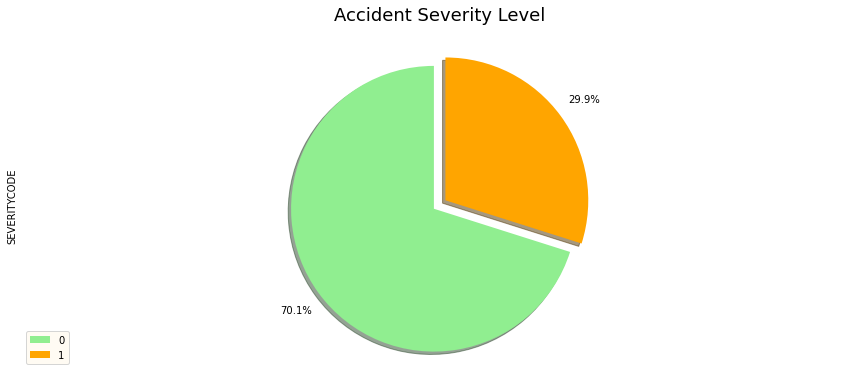

In [33]:
# Percentage of each level of severity of accidents

explode_list = [0.05, 0.05]
color_list=['lightgreen','orange']
#yellowgreen indianred
severity_Type=df['SEVERITYCODE'].value_counts()

severity_Type.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.2,
            colors=color_list,
            explode=explode_list
            )

plt.rcParams['axes.facecolor'] = 'floralwhite'

plt.title('Accident Severity Level', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=severity_Type.index, loc='lower left')

plt.show()

<hr>
<strong>1. Accidents in correlation to the address type</strong>
<hr>

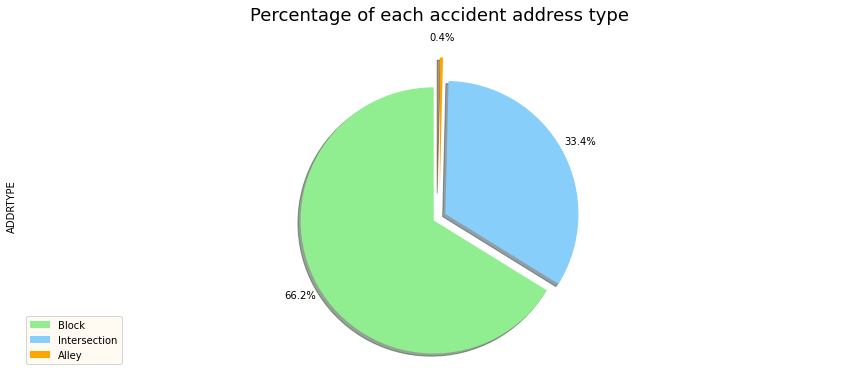

In [34]:
# Percentages of accidents for each adress type

explode_list = [0.05, 0.05, 0.2]
color_list=['lightgreen','lightskyblue','orange']
address_Type=df['ADDRTYPE'].value_counts()

address_Type.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.15,
            colors=color_list,
            explode=explode_list)


plt.title('Percentage of each accident address type', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=address_Type.index, loc='lower left')

plt.show()

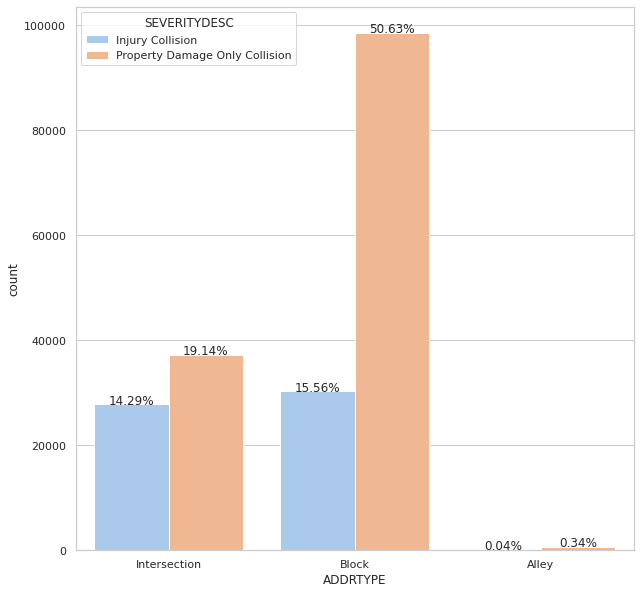

In [35]:
# We want to how the type of address has an impact on the severity of the accident

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_palette("pastel")
total = float(len(df)) # one person per row 
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

<hr>
<strong>2. Accidents in correlation to weather conditions</strong>
<hr>

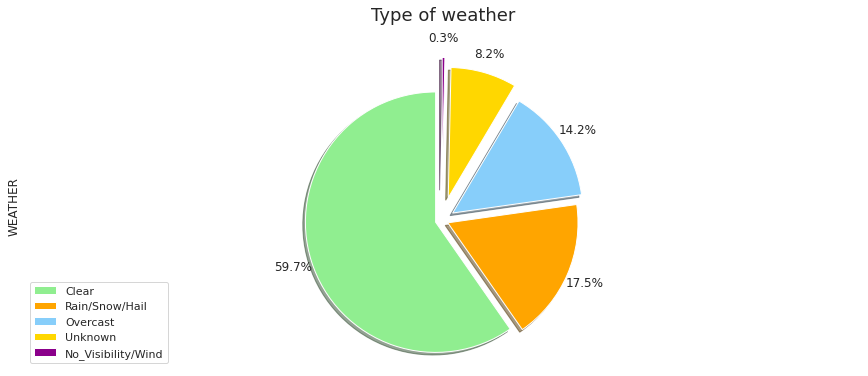

In [36]:
# Percentages of accidents for each weather condition

explode_list = [0.05, 0.05, 0.1, 0.18, 0.25]
color_list=['lightgreen','orange','lightskyblue','gold','darkmagenta']
weather_Type=df['WEATHER'].value_counts()

weather_Type.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.15,
            colors=color_list,
            explode=explode_list)


plt.title('Type of weather', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=weather_Type.index, loc='lower left')

plt.show()

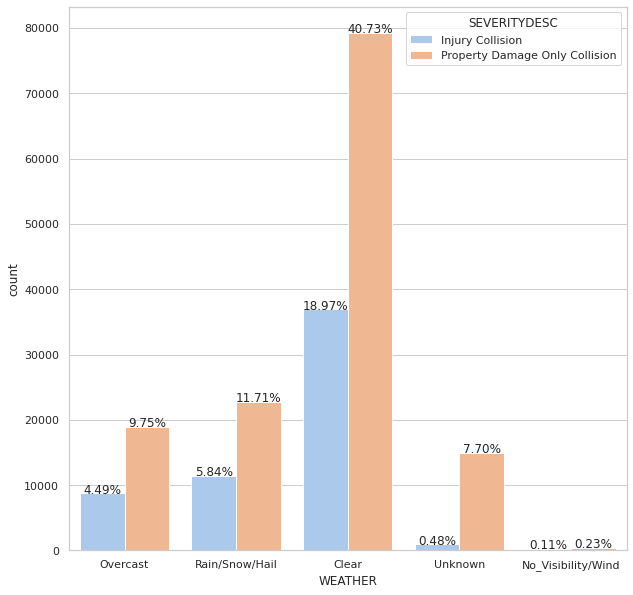

In [37]:
# We want to how the weather condition has an impact on the severity of the accident

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_palette("pastel")
total = float(len(df)) # one person per row 
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

<hr>
<strong>3. Accidents in correlation to light conditions</strong>
<hr>

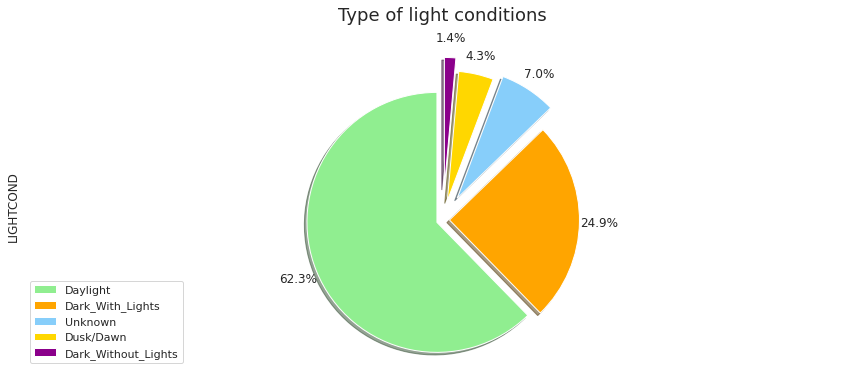

In [38]:
# Percentages of accidents for each light condition

explode_list = [0.05, 0.05, 0.2, 0.15, 0.25]
color_list=['lightgreen','orange','lightskyblue','gold','darkmagenta']
light_Type=df['LIGHTCOND'].value_counts()

light_Type.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.15,
            colors=color_list,
            explode=explode_list)


plt.title('Type of light conditions', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=light_Type.index, loc='lower left')

plt.show()

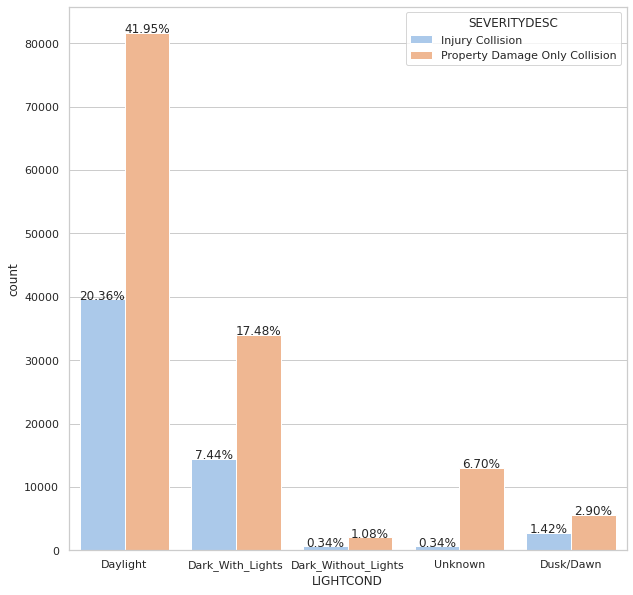

In [39]:
# We want to how the light condition has an impact on the severity of the accident

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_palette("pastel")
total = float(len(df)) # one person per row 
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

<hr>
<strong>4. Accidents in correlation to road conditions</strong>
<hr>

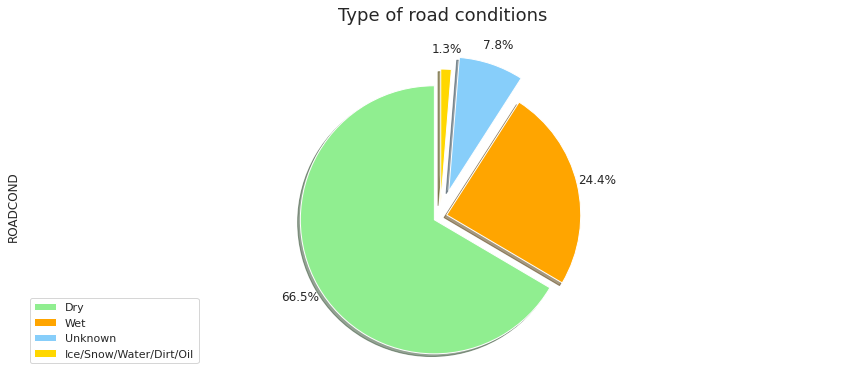

In [40]:
# Percentages of accidents for each road condition

explode_list = [0.05, 0.05, 0.2, 0.1]
color_list=['lightgreen','orange','lightskyblue','gold']
road_Type=df['ROADCOND'].value_counts()

road_Type.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.15,
            colors=color_list,
            explode=explode_list)


plt.title('Type of road conditions', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=road_Type.index, loc='lower left')

plt.show()

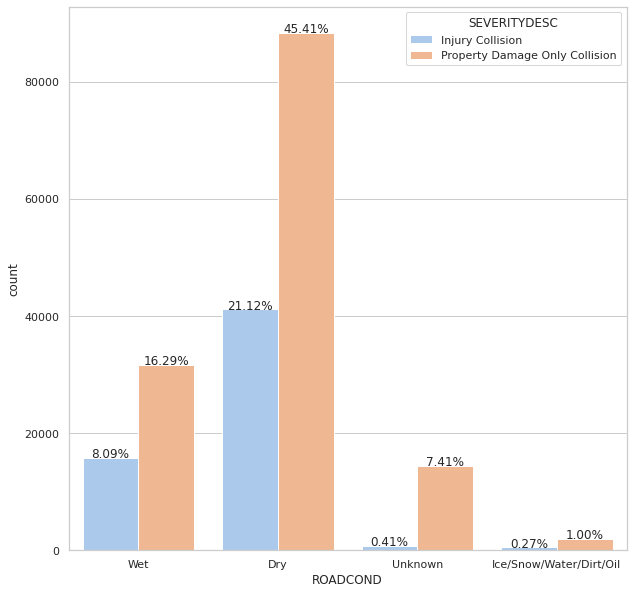

In [41]:
# We want to how the road condition has an impact on the severity of the accident

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
sns.set_palette("pastel")
total = float(len(df)) # one person per row 
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

<hr>
<strong>5. Which TRUE/FALSE variable has the biggest impact on the severity of the accident</strong>
<hr>

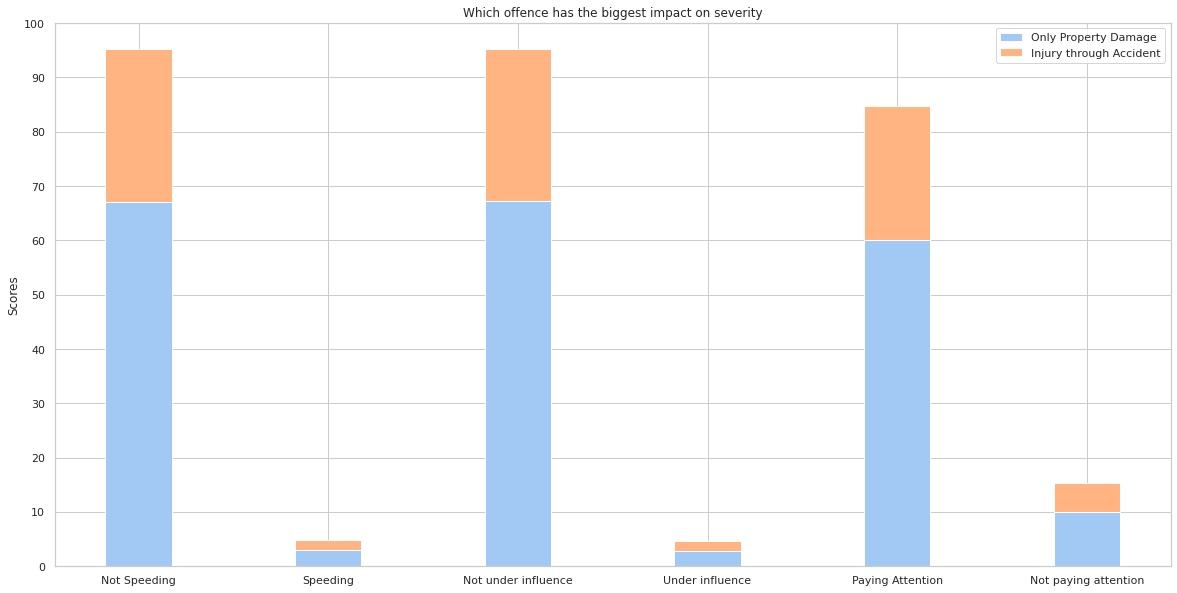

In [42]:
# Show which variable has a big impact on the severity of an accident
N = 6

unSevereMeans = ((((df['SPEEDING'] == 0) & (df['SEVERITYCODE'] == 0)).sum()/(df['SPEEDING'].count())*100), 
                 (((df['SPEEDING'] == 1) & (df['SEVERITYCODE'] == 0)).sum()/(df['SPEEDING'].count())*100),
                 (((df['UNDERINFL'] == 0) & (df['SEVERITYCODE'] == 0)).sum()/(df['UNDERINFL'].count())*100), 
                 (((df['UNDERINFL'] == 1) & (df['SEVERITYCODE'] == 0)).sum()/(df['UNDERINFL'].count())*100), 
                 (((df['INATTENTIONIND'] == 0) & (df['SEVERITYCODE'] == 0)).sum()/(df['INATTENTIONIND'].count())*100),
                 (((df['INATTENTIONIND'] == 1) & (df['SEVERITYCODE'] == 0)).sum()/(df['INATTENTIONIND'].count())*100))
severeMeans = ((((df['SPEEDING'] == 0) & (df['SEVERITYCODE'] == 1)).sum()/(df['SPEEDING'].count())*100),
               (((df['SPEEDING'] == 1) & (df['SEVERITYCODE'] == 1)).sum()/(df['SPEEDING'].count())*100),
               (((df['UNDERINFL'] == 0) & (df['SEVERITYCODE'] == 1)).sum()/(df['UNDERINFL'].count())*100),
               (((df['UNDERINFL'] == 1) & (df['SEVERITYCODE'] == 1)).sum()/(df['UNDERINFL'].count())*100),
               (((df['INATTENTIONIND'] == 0) & (df['SEVERITYCODE'] == 1)).sum()/(df['INATTENTIONIND'].count())*100),
               (((df['INATTENTIONIND'] == 1) & (df['SEVERITYCODE'] == 1)).sum()/(df['INATTENTIONIND'].count())*100))



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, unSevereMeans, width)
p2 = plt.bar(ind, severeMeans, width, bottom=unSevereMeans)


plt.ylabel('Scores')
plt.title('Which offence has the biggest impact on severity')
plt.xticks(ind, ('Not Speeding', 'Speeding', 'Not under influence', 'Under influence', 'Paying Attention', 'Not paying attention'))
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('Only Property Damage', 'Injury through Accident'))

plt.show()

<hr>
<h1 align="left" id="machine_learning">Machine Learning Model Development</h1>

<h3 align="left" id="preparation">Preparation</h3>

Step one is importing all necessary libraries for the machine learning model to work. We then need to prepare the data to be handled by our machine learning models. <br/>
For that we need to select the right features to work with and convert categorical features to numerical values. 

<hr>

In [43]:
#!pip list

In [65]:
# Importing pre-processing tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing Oversampling Tools
!pip install -U imbalanced-learn
#!conda install -c glemaitre imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Importing models 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing evaluation metrics
import time
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve

Requirement already up-to-date: imbalanced-learn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.7.0)


In [45]:
# See which columns are in our dataframe

df.columns

Index(['SEVERITYCODE', 'SEVERITYDESC', 'ADDRTYPE', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR', 'hourofday', 'dayofweek'],
      dtype='object')

In [46]:
# Selecting our features for the model

features = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR']]
features

,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,Intersection,At_Intersection,0.0,0,Overcast,Wet,Daylight,0,0
1,Block,At_Mid-Block,0.0,0,Rain/Snow/Hail,Wet,Dark_With_Lights,0,0
2,Block,At_Mid-Block,0.0,0,Overcast,Dry,Daylight,0,0
3,Block,At_Mid-Block,0.0,0,Clear,Dry,Daylight,0,0
4,Intersection,At_Intersection,0.0,0,Rain/Snow/Hail,Wet,Daylight,0,0
...,...,...,...,...,...,...,...,...,...
194668,Block,At_Mid-Block,0.0,0,Clear,Dry,Daylight,0,0
194669,Block,At_Mid-Block,1.0,0,Rain/Snow/Hail,Wet,Daylight,0,0
194670,Intersection,At_Intersection,0.0,0,Clear,Dry,Daylight,0,0
194671,Intersection,At_Intersection,0.0,0,Clear,Dry,Dusk/Dawn,0,0


<hr>
<strong>We also need to convert categorical values like the feature ADDRTYPE into numberical values via one-hot-encoding.</strong>
<hr>

In [47]:
# First we want to see which features still are of the type object, because they need to be a numerical class

features.dtypes

ADDRTYPE           object
JUNCTIONTYPE       object
INATTENTIONIND    float64
UNDERINFL           int64
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING            int64
HITPARKEDCAR        int64
dtype: object

In [48]:
# We want to make sure which features we still have to transform into numerical variables

mask_if_categorical_feature = features.dtypes==object
mask_if_categorical_feature

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND    False
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING          False
HITPARKEDCAR      False
dtype: bool

In [49]:
# Build a list of which columns to transform

transform_columns = features.columns[mask_if_categorical_feature].tolist()
transform_columns

['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

In [50]:
# We transform all features to the correct type

features["INATTENTIONIND"]=features["INATTENTIONIND"].astype(int)

# We use pandas.get_dummies() to convert the categorical variables into numerical variables

features = pd.get_dummies(features)

features.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,INATTENTIONIND,UNDERINFL,SPEEDING,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At_Intersection,JUNCTIONTYPE_At_Mid-Block,JUNCTIONTYPE_At_Ramp/Driveway,...,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice/Snow/Water/Dirt/Oil,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark_With_Lights,LIGHTCOND_Dark_Without_Lights,LIGHTCOND_Daylight,LIGHTCOND_Dusk/Dawn,LIGHTCOND_Unknown
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [51]:
# Make sure everything looks correct

mask_if_categorical_feature = features.dtypes==object
mask_if_categorical_feature

INATTENTIONIND                      False
UNDERINFL                           False
SPEEDING                            False
HITPARKEDCAR                        False
ADDRTYPE_Alley                      False
ADDRTYPE_Block                      False
ADDRTYPE_Intersection               False
JUNCTIONTYPE_At_Intersection        False
JUNCTIONTYPE_At_Mid-Block           False
JUNCTIONTYPE_At_Ramp/Driveway       False
WEATHER_Clear                       False
WEATHER_No_Visibility/Wind          False
WEATHER_Overcast                    False
WEATHER_Rain/Snow/Hail              False
WEATHER_Unknown                     False
ROADCOND_Dry                        False
ROADCOND_Ice/Snow/Water/Dirt/Oil    False
ROADCOND_Unknown                    False
ROADCOND_Wet                        False
LIGHTCOND_Dark_With_Lights          False
LIGHTCOND_Dark_Without_Lights       False
LIGHTCOND_Daylight                  False
LIGHTCOND_Dusk/Dawn                 False
LIGHTCOND_Unknown                 

In [52]:
# Make sure everything looks correct

features.dtypes

INATTENTIONIND                      int64
UNDERINFL                           int64
SPEEDING                            int64
HITPARKEDCAR                        int64
ADDRTYPE_Alley                      uint8
ADDRTYPE_Block                      uint8
ADDRTYPE_Intersection               uint8
JUNCTIONTYPE_At_Intersection        uint8
JUNCTIONTYPE_At_Mid-Block           uint8
JUNCTIONTYPE_At_Ramp/Driveway       uint8
WEATHER_Clear                       uint8
WEATHER_No_Visibility/Wind          uint8
WEATHER_Overcast                    uint8
WEATHER_Rain/Snow/Hail              uint8
WEATHER_Unknown                     uint8
ROADCOND_Dry                        uint8
ROADCOND_Ice/Snow/Water/Dirt/Oil    uint8
ROADCOND_Unknown                    uint8
ROADCOND_Wet                        uint8
LIGHTCOND_Dark_With_Lights          uint8
LIGHTCOND_Dark_Without_Lights       uint8
LIGHTCOND_Daylight                  uint8
LIGHTCOND_Dusk/Dawn                 uint8
LIGHTCOND_Unknown                 

<hr>

<h3 align="left" id="test_train">Splitting Test and Training Sets</h3>

We will now build our training and test sets, as well as balance them before building our different models.

<hr>

In [53]:
# Selecting our target variable and building the machine learnign feature sets

y = df['SEVERITYCODE'].values
x = features.values
x[0:5]

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0]])

<hr>
<strong>We want to build our test and training sets and then balance the data using the SMOTE method from imblearn.</strong>
<hr>

In [54]:
x_train_unbalanced, x_test, y_train_unbalanced, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

print('Size of unbalanced training set: x:', x_train_unbalanced.shape[0], ", y:", y_train_unbalanced.shape[0],'\n'
      'Size of test set: x:', x_test.shape[0], ", y:", y_test.shape[0],'\n')

Size of unbalanced training set: x: 136271 , y: 136271 
Size of test set: x: 58402 , y: 58402 



In [55]:
#import imblearn

#!pip3 install -U imbalanced-learn
#!conda install -c conda-forge imbalanced-learn

In [56]:
# Balance the data using a method from the imblearn library called SMOTE (Synthetic Minority Over-sampling Technique). It will generate more data to create a balance in the unbalanced data.

os = SMOTE (random_state=0)
x_train, y_train = os.fit_sample(x_train_unbalanced, y_train_unbalanced)
print ('Size of training set: x:', x_train.shape[0], ", y:", y_train.shape[0])

Size of training set: x: 190804 , y: 190804


In [57]:
# Make sure everything looks correct

print("----------Sample Percentage before using SMOTE--------------")
print(pd.Series(y_train_unbalanced).value_counts()/len(y_train_unbalanced))
print("----------Sample Percentage after using SMOTE--------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample Percentage before using SMOTE--------------
0    0.70009
1    0.29991
dtype: float64
----------Sample Percentage after using SMOTE--------------
1    0.5
0    0.5
dtype: float64


<hr>

<h3 align="left" id="model">Model Development</h3>

We will now build our machine learning models.

<strong>1. Decision Tree</strong>

<hr>

In [58]:
# Measure time for building the model
t0=time.time()

decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
decision_tree.fit(x_train, y_train)

time_decision_tree = time.time()-t0

print('Time taken to build the model:' , time_decision_tree, "seconds")

# Make a prediction:
yhat_decision_tree = decision_tree.predict(x_test)

# Check for its accuracy
print('Accuracy score for our decision tree = ', accuracy_score(yhat_decision_tree, y_test))

# Visualize the results
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhat_decision_tree.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Time taken to build the model: 0.24491190910339355 seconds
Accuracy score for our decision tree =  0.6146878531557138
Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24928  16155  41083
1           6348  10971  17319
All        31276  27126  58402


[[24928 16155]
 [ 6348 10971]]


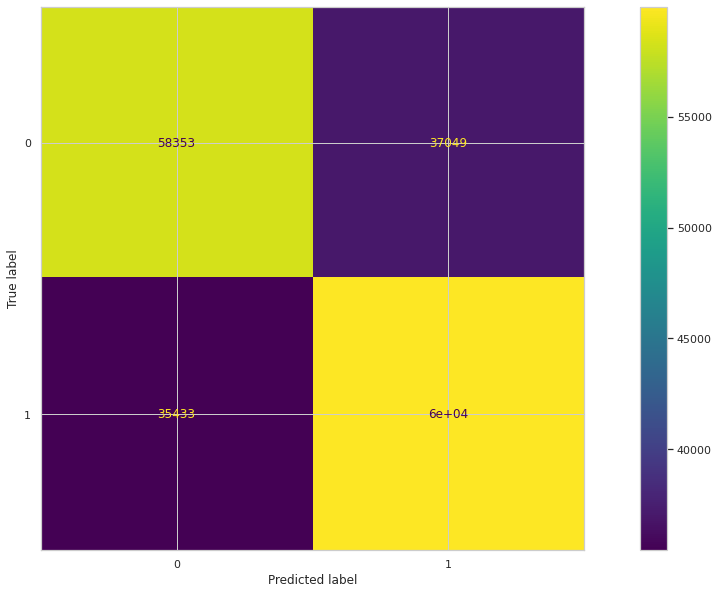

In [59]:
# Show a graphical confusion matrix of the results

print(confusion_matrix(y_test, yhat_decision_tree))

plot_confusion_matrix(decision_tree, x_train, y_train, include_values=True)
plt.show()

In [60]:
# Evaluation of the results

jaccard_decision_tree = jaccard_score(y_test,yhat_decision_tree)
classification_decision_tree = classification_report(y_test,yhat_decision_tree)
precision_decision_tree = precision_score(y_test, yhat_decision_tree)
recall_decision_tree = recall_score(y_test, yhat_decision_tree)

print('Jaccard score for the decision tree model:',jaccard_decision_tree,'\n',
     classification_decision_tree)

Jaccard score for the decision tree model: 0.3277469080480373 
               precision    recall  f1-score   support

           0       0.80      0.61      0.69     41083
           1       0.40      0.63      0.49     17319

    accuracy                           0.61     58402
   macro avg       0.60      0.62      0.59     58402
weighted avg       0.68      0.61      0.63     58402



<hr>
<strong>2. Logistic Regression</strong>
<hr>

In [61]:
# Measure time for building the model
t0=time.time()

logistic_regression = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

time_logistic_regression = time.time()-t0

print('Time taken to build the model:' , time_logistic_regression, "seconds")

# Make a prediction:
yhat_logistic_regression = logistic_regression.predict(x_test)
yhat_probability = logistic_regression.predict_proba(x_test)

# Check for its accuracy
print('Logistic loss of the model: ', log_loss(y_test, yhat_probability))

print ("Accuracy score for logistic regression model = ", accuracy_score(yhat_logistic_regression,y_test))

# Visualize the results
print('Confusion Matrix - Logistic Regression')
print(pd.crosstab(y_test.ravel(), yhat_logistic_regression.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Time taken to build the model: 0.4548652172088623 seconds
Logistic loss of the model:  0.6448849201086271
Accuracy score for logistic regression model =  0.6059039074004315
Confusion Matrix - Logistic Regression
Predicted      0      1    All
True                          
0          23850  17233  41083
1           5783  11536  17319
All        29633  28769  58402


[[23850 17233]
 [ 5783 11536]]


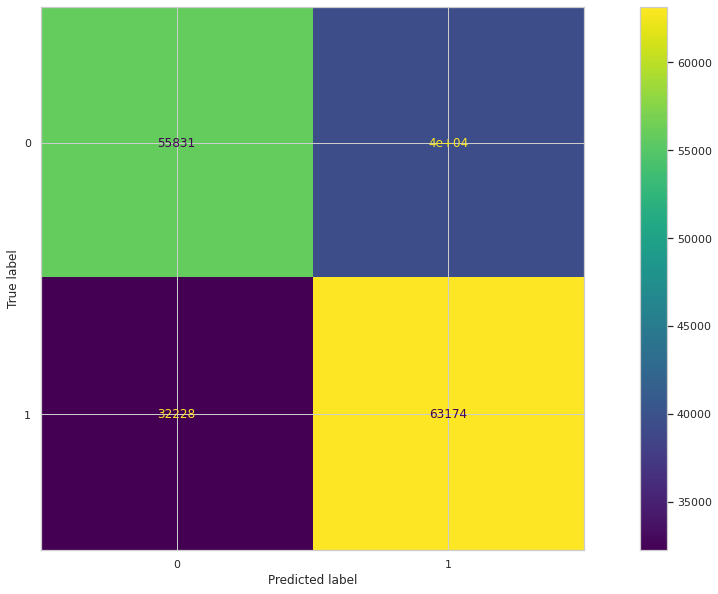

In [62]:
# Show a confusion matrix of the results

print(confusion_matrix(y_test, yhat_logistic_regression))

plot_confusion_matrix(logistic_regression, x_train, y_train, include_values=True)
plt.show()

In [63]:
# Evaluation of the results

jaccard_logistic_regression = jaccard_score(y_test,yhat_logistic_regression)
classification_logistic_regression = classification_report(y_test,yhat_logistic_regression)
precision_logistic_regression = precision_score(y_test, yhat_logistic_regression)
recall_logistic_regression = recall_score(y_test, yhat_logistic_regression)

print('Jaccard score for the logistic regression model:',jaccard_logistic_regression,'\n',
     classification_logistic_regression)

Jaccard score for the logistic regression model: 0.3338735818476499 
               precision    recall  f1-score   support

           0       0.80      0.58      0.67     41083
           1       0.40      0.67      0.50     17319

    accuracy                           0.61     58402
   macro avg       0.60      0.62      0.59     58402
weighted avg       0.69      0.61      0.62     58402



<hr>
<strong>3. K Nearest Neighbor (KNN)</strong>

First we want to find out how many neighbors give the best accuracy performance for the model.
<hr>

In [66]:
# Determine the best amount of neighbors to use in the knn model

ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfustionMx = [];
for n in range(1,ks):
    
    #Train Model and Predict  
    k_neighbors_classifier = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat_k_neighbors_classifier=k_neighbors_classifier.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_k_neighbors_classifier)

    
    std_acc[n-1]=np.std(yhat_k_neighbors_classifier==y_test)/np.sqrt(yhat_k_neighbors_classifier.shape[0])

mean_acc

array([0.63271806, 0.69213383, 0.64845382, 0.69321256, 0.65204959,
       0.69548988, 0.66869285, 0.67706585, 0.66242594])

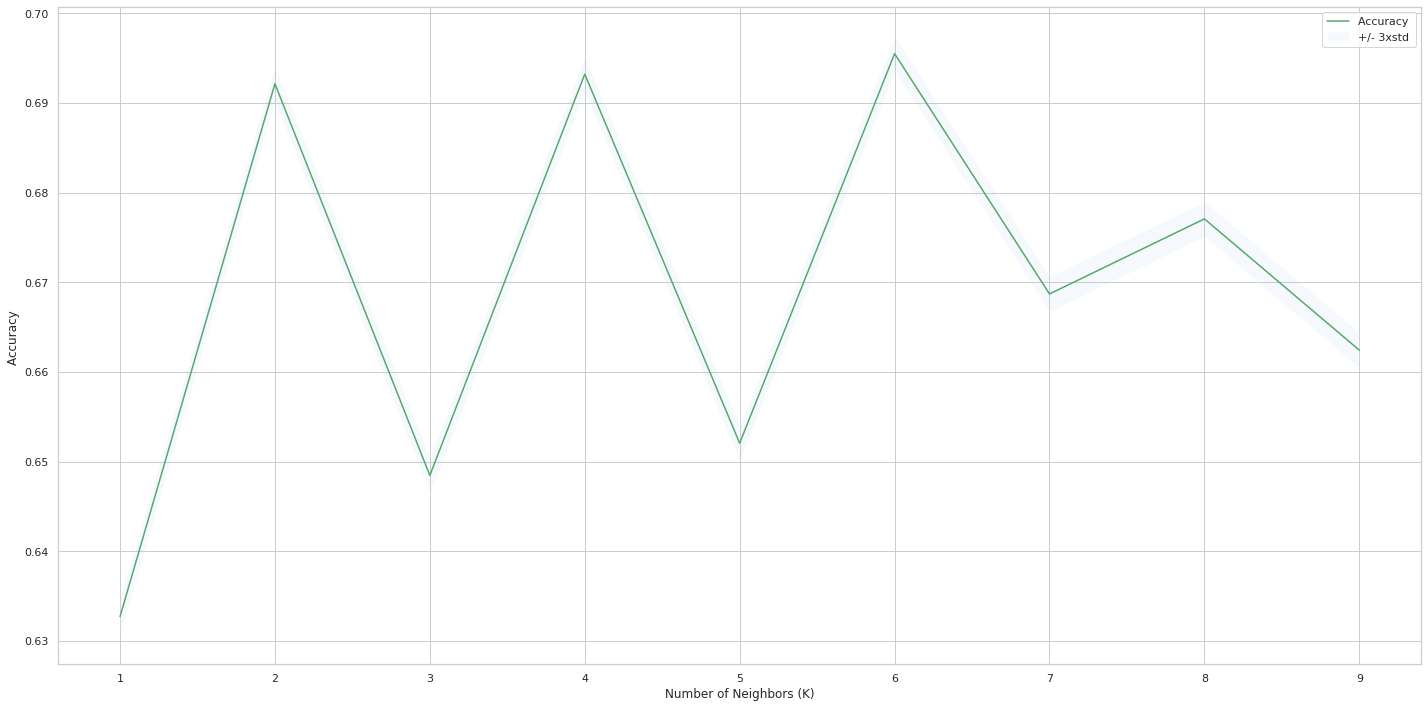

Best performing K is 6 with an accuracy of 0.6954898804835451


In [67]:
# Plot those results

plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

In [68]:
# Measure time for building the model
t0=time.time()

k_neighbors_classifier = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(x_train,y_train)

time_k_neighbors_classifier = time.time()-t0

print('Time taken to build the model:' , time_k_neighbors_classifier, "seconds")

# Make a prediction:
yhat_k_neighbors_classifier = k_neighbors_classifier.predict(x_test)

# Check for its accuracy

print ("Accuracy score for K nearest neighbor model = ", accuracy_score(yhat_k_neighbors_classifier,y_test))

# Visualize the results
print('Confusion Matrix - K Nearest Neighbor')
print(pd.crosstab(y_test.ravel(), yhat_k_neighbors_classifier.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Time taken to build the model: 73.85406589508057 seconds
Accuracy score for K nearest neighbor model =  0.6954898804835451
Confusion Matrix - K Nearest Neighbor
Predicted      0     1    All
True                         
0          39828  1255  41083
1          16529   790  17319
All        56357  2045  58402


[[39828  1255]
 [16529   790]]


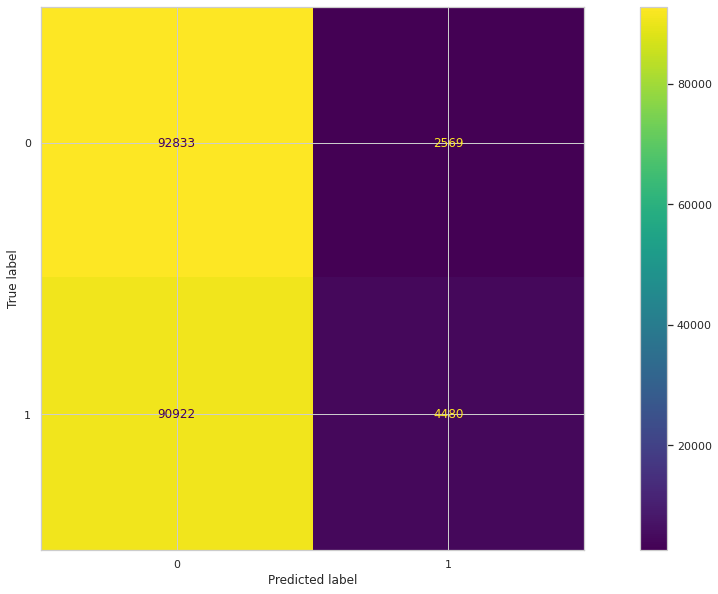

In [72]:
# Show a confusion matrix of the results

print(confusion_matrix(y_test, yhat_k_neighbors_classifier))

plot_confusion_matrix(k_neighbors_classifier, x_train, y_train, include_values=True)
plt.show()

In [73]:
# Evaluation of the results

jaccard_k_neighbors_classifier = jaccard_score(y_test,yhat_k_neighbors_classifier)
classification_k_neighbors_classifier = classification_report(y_test,yhat_k_neighbors_classifier)
precision_k_neighbors_classifier = precision_score(y_test, yhat_k_neighbors_classifier)
recall_k_neighbors_classifier = recall_score(y_test, yhat_k_neighbors_classifier)

print('Jaccard score for the logistic regression model:',jaccard_k_neighbors_classifier,'\n',
     classification_k_neighbors_classifier)

Jaccard score for the logistic regression model: 0.0425325724130505 
               precision    recall  f1-score   support

           0       0.71      0.97      0.82     41083
           1       0.39      0.05      0.08     17319

    accuracy                           0.70     58402
   macro avg       0.55      0.51      0.45     58402
weighted avg       0.61      0.70      0.60     58402



<hr>
<h1 align="left" id="results">Results</h1>

<h3 align="left" id="metrics">Metrics</h3>

We want to compare the accuracy of the built model using different evaluation metrics. We will also add a column for the time needed to build the model, to further evaluate each version.

For the car accident severity problem the <strong>precision</strong> value allows us to evaluate how accurate our predictions were regarding how many of our predicted severe accidents were actually severe.
The <strong>recall</strong> value allows us to evaluate how accurate our predictions were regarding the percentage of severe cases predicted correctly.

<hr>

In [74]:
# Build a table to compare the evaluation metrics


f1_decision_tree = f1_score(y_test, yhat_decision_tree, average='weighted')
f1_logistic_regression = f1_score(y_test, yhat_logistic_regression, average='weighted')
f1_k_neighbors_classifier = f1_score(y_test, yhat_k_neighbors_classifier, average='weighted')

logloss_logistic_regression = log_loss(y_test, yhat_probability)

list_accuracy = [accuracy_score(yhat_decision_tree,y_test), accuracy_score(yhat_logistic_regression,y_test), accuracy_score(yhat_k_neighbors_classifier,y_test)]
list_jaccard = [jaccard_decision_tree, jaccard_logistic_regression, jaccard_k_neighbors_classifier]
list_f1s = [f1_decision_tree, f1_logistic_regression, f1_k_neighbors_classifier]
list_precision = [precision_decision_tree, precision_logistic_regression, precision_k_neighbors_classifier]
list_recall = [recall_decision_tree, recall_logistic_regression, recall_k_neighbors_classifier]
list_time = [time_decision_tree, time_logistic_regression, time_k_neighbors_classifier]
list_logloss = ['NA', logloss_logistic_regression, 'NA']



# Formulate the report format
df_results = pd.DataFrame(list_accuracy, index=['Decision Tree','Logistic Regression','KNN'])
df_results.columns = ['Accuracy']
df_results.insert(loc=1, column='Jaccard', value=list_jaccard)
df_results.insert(loc=2, column='F1-score', value=list_f1s)
df_results.insert(loc=3, column='Precision', value=list_precision)
df_results.insert(loc=4, column='Recall', value=list_recall)
df_results.insert(loc=5, column='Time (s)', value=list_time)
df_results.insert(loc=6, column='LogLoss', value=list_logloss)
df_results.columns.name = 'Algorithm'
df_results

Algorithm,Accuracy,Jaccard,F1-score,Precision,Recall,Time (s),LogLoss
Decision Tree,0.614688,0.327747,0.631087,0.404446,0.633466,0.244912,NA
Logistic Regression,0.605904,0.333874,0.622953,0.400987,0.666089,0.454865,0.644885
KNN,0.695490,0.042533,0.599260,0.386308,0.045615,73.854066,NA


<hr>
<strong>Interpretation of the results for the different evaluation metrics</strong>

The results for the decision tree and logistic regression model seem to have been good. On the other hand, the accuracy value for KNN model was the best, yet the jaccard and recall score have been very lackluster. After taking a significantly longer time to build the model, the recall and jaccard value have been evaluated as poor. That means that our KNN model didn't predict the severe accident cases correctly.<br>

This can be attributed to the high number of features present in this data set, which can have a negative influence on the accuary of the model.

Regarding the importance of each metric, the recall value also has a high importance for this specific problem. A high recall would mean that we accurately recognize the factors leading to a severe accident and can then adjust to those situations. The precision can give us more information about how many predicted severe accidents were false positives and unnecessarily made us react.

The logistic regression and decision tree models have similar accuracy, with the decision tree model having the best computational time out of all the models. After evaluation, the best model is the logistic regression model. It equals the decision tree model in most categories, but has a better recall value which we put an emphasis on in this specific problem.

<hr>

<h3 align="left" id="roc">ROC Curve</h3>

Another highly regarded metric to evaluate the success of the predictions made by a machine learning model is the <strong>receiver operating characteristic curve</strong>.
It graphically illustrates the relationship between the true positive rate and the false positive rate. A particularly strong model would have high true positive rate values for opposing false positive rate values.

Speaking graphically, the desired curve should be a steep curve in the top left corner.

<hr>

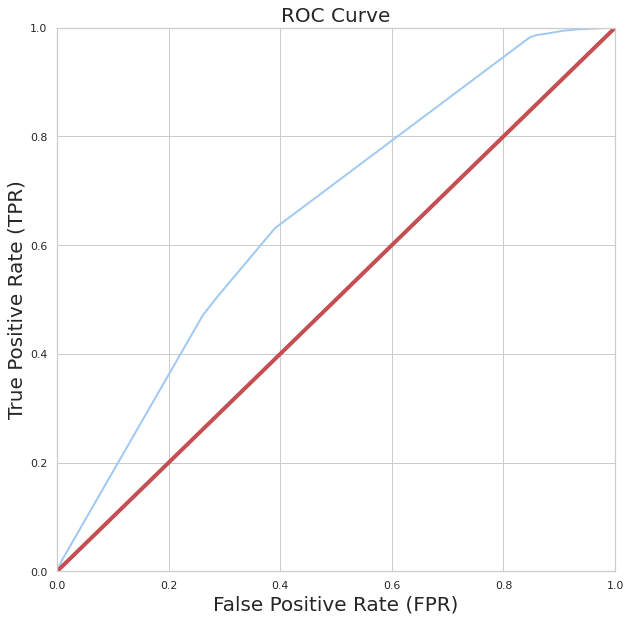

In [75]:
# Plot the ROC curve to further evaluate the decision tree model

y_scores = decision_tree.predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=20)
    plt.ylabel('True Positive Rate (TPR)', fontsize=20)

plt.figure(figsize=(10, 10))
plt.title('ROC Curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

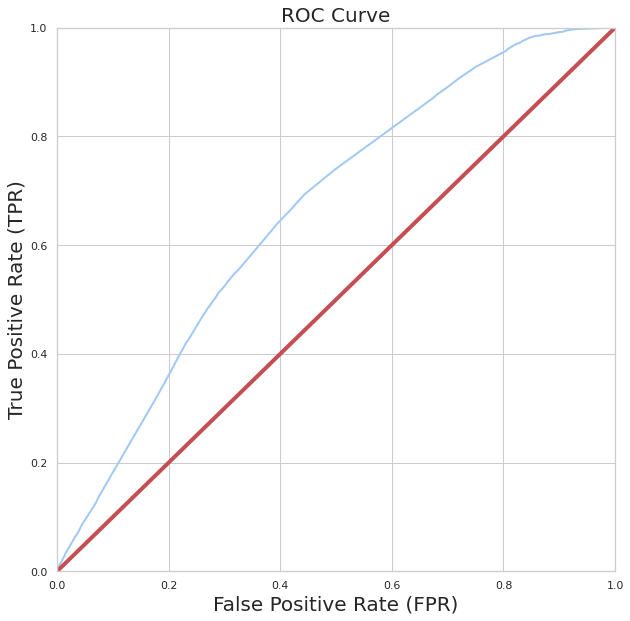

In [76]:
# Plot the ROC curve to further evaluate the logistic regression model

y_scores = logistic_regression.predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=20)
    plt.ylabel('True Positive Rate (TPR)', fontsize=20)

plt.figure(figsize=(10, 10))
plt.title('ROC Curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

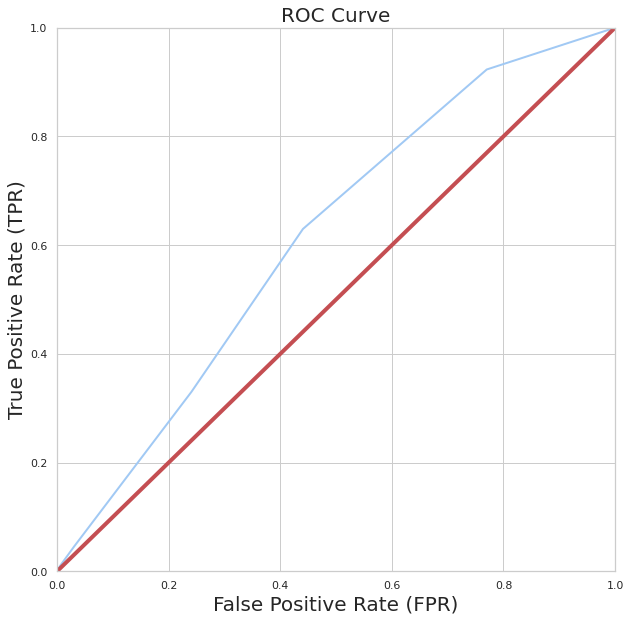

In [77]:
# Plot the ROC curve to further evaluate the k nearest neighbor classifier model

y_scores = k_neighbors_classifier.predict_proba(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='a')
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=20)
    plt.ylabel('True Positive Rate (TPR)', fontsize=20)

plt.figure(figsize=(10, 10))
plt.title('ROC Curve', fontsize=20)
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

<hr>
<strong>Interpretation of the results for the ROC Curve</strong>

We see that the curves for our decision tree and logistic regression models were both quite accurate and pretty close together.The ROC curve for the KNN model adds to the fact that our KNN model din't work out that greatly. 

All in all we recommend the usage of the logistic regression model to predict the severity of accidents, due to it performing the best across the different evaluation methods.

<hr>

Thanks for reading this far in the notebook regarding car accident severity analysis. I hope you found it interesting and potentially learned something new.

Kind regards <br>
Robin Kjär